In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
import hola_mundo_sub
hola_mundo_sub.hola_mundo()

'Hola, mundo!'

In [42]:
#vamos a hacer la descomposicion dinamica

import h5py
import rotation as rot
import numpy as np
import jc

h=0.732
G = 4.299e-6
a0=1
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
vector = ('00','01','03','09','13','14','18','19','20','21')

snapshot=range(497,496,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    #a = snap['subhalo_000/Time'].value
    #z = (a0/a)-1
    #t = conv(z, h, omega_lambda, omega_matter)

    for i in range(0,1):
        pstr = snap['subhalo_0'+ str('%s'%vector[i]) +'/Str/Coordinates'].value
        cm   = snap['subhalo_0'+ str('%s'%vector[i]) +'/Center'].value
        vel  = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Velocities'].value
        masa = snap['subhalo_0'+ str('%s'%vector[i]) +'/Str/Masses'].value
        r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'].value
        
#---------paso las coordenadas respecto al centro de la galaxia-------
        xstr = (pstr[:,0]-cm[0])/h
        ystr = (pstr[:,1]-cm[1])/h
        zstr = (pstr[:,2]-cm[2])/h
        r = np.sqrt(xstr**2+ystr**2+zstr**2)
        
#---------------masas------------------------------------------        
        masa = masa/h
        
        rgal=0.15*r200
        
        limit = np.where(r<rgal)
        r_sort = np.sort(r[limit])
        r_indice = np.argsort(r[limit])
                
        Mc = np.cumsum((masa[limit])[r_indice])
        Mgal = Mc[-1]
               
        razon = Mc/Mgal
        noventa, = np.where(razon < 0.9)
        cincuenta, = np.where(razon < 0.5)
        
        r90 = r_sort[noventa]
        r50 = r_sort[cincuenta]
#------------------------------------------------------------------        
##esto sirve si quiero hacer una submuestra de mi conjunto de datos
       
        veloc,=np.where(r<r50[-1])
        
#----------componentes de la velocidad del centro de masa------------
        vxcm = sum(masa[veloc]*vel[veloc,0])/sum(masa[veloc])
        vycm = sum(masa[veloc]*vel[veloc,1])/sum(masa[veloc])
        vzcm = sum(masa[veloc]*vel[veloc,2])/sum(masa[veloc])
        
#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
        vx = vel[:,0] - vxcm
        vy = vel[:,1] - vycm
        vz = vel[:,2] - vzcm
        
        #v_x = np.sort(vx[limit])
        #v_y = np.sort(vy[limit])
        #v_z = np.sort(vz[limit])

        K = 1./2*(vx**2+vy**2+vz**2)

        
#calculemos la energia potencial
        num = len(r[limit])
        print num
        r = r[limit]
        masa = masa[limit]
        print r, masa
        
        u = zeros(5)
        for i in range(0,5):
            for j in range(0,num-1):
                dist = abs(r[i]-r[j])
                if i != j and dist != 0 :
                    aux = G *masa[i]*masa[j]*1e20/dist
                    u[i] = aux + u[i] 
            print i
        print u
        

 426872
[ 18.26794243  17.41469765  17.70786858 ...,  18.23836899  18.10791588
  18.03760719] [  3.02298827e-06   3.02298827e-06   3.02298827e-06 ...,   3.02298827e-06
   3.02298827e-06   3.02298827e-06]
0
1
2
3
4
[  3.73291269e+08   4.32091631e+08   4.42889264e+08   3.72061092e+08
   3.12611878e+08]


In [43]:
import energia_potencial
energia_potencial.ep_str(masa, r, num)

array([  2.79623296e+08,   3.42590208e+08,   4.42664384e+08], dtype=float32)

In [52]:
a = range (1,10)
b = range (2,11)
c = range (3,12)

print a
d = np.ndarray([np.size(a),3])
d[:,0] = a
d[:,1] = b
d[:,2] = c
print d[:,0]

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9.]


In [41]:
np.savetxt('prueba.dat', d, '%12.6f', '\t')

In [55]:
x = d[:,0]**2 + d[:,0]**2
print x

[   2.    8.   18.   32.   50.   72.   98.  128.  162.]


In [3]:
cm=np.loadtxt('/home/ornela/python/energia_potencial3.dat')
u_str = cm[:,0]
u_gas = cm[:,1]
u_drk = cm[:,2]

U = u_str + u_gas + u_drk
U = U/(m0*1e10)
e = K - U
#print len(e)
#print K
#print U

#------Momento angular---------------

Jz = xn*v_y - yn*v_x


NameError: name 'm0' is not defined

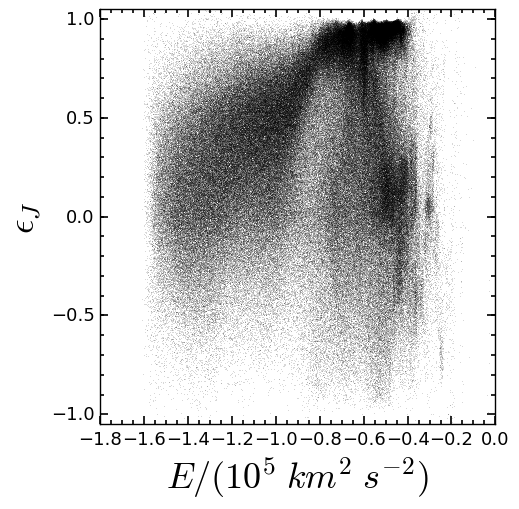

In [5]:
cm2=np.loadtxt('/home/ornela/python/energ_jz_sh00.dat')
e = cm2[:,0]
jz = cm2[:,1]
jcir = cm2[:,2]

circ = jz/jcir

fig=plt.figure(1, figsize=(5,5))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(e/1e5,circ,'.', markersize=0.1, color = 'k')
#ax.plot(e/1e5,jcir,'.', markersize=0.1, color = 'magenta')
ax.set_ylim(-1.05,1.05)
#ax.set_xlim(-0.7,0)
#ax.set_title('subhalo_0'+ str('%s'%vector[i]), fontsize=24)
ax.set_xlabel(u'$E/(10^{5}\;km^{2}\;s^{-2})$', fontsize=26)
ax.set_ylabel(u'$\epsilon_{J}$', fontsize=26)
ax.minorticks_on()
ax.tick_params( labelsize=13)
ax.tick_params('both', length=3, width=1.2,which='minor')
ax.tick_params('both', length=6, width=1.2,which='major')
#plt.text(x = 3, y = 0.48-(0.03*k), 
#         s ='sh0'+ str('%s'%vector[i])+': '+ 'Rmax='+ str('%.3f'%rmax)+', A2max=' + str('%.3f'%A2max),
#        fontsize = 20, verticalalignment = 'center', horizontalalignment = 'center', 
#        color = '%s'%vec2[i])
plt.show()